# Explore here

# **Pip & Requirements**

In [7]:
pip install -r /workspaces/regularized-linear-regression-project-tutorial/requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# **All Imports**

In [9]:
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from pickle import dump

# **Initializations**

In [10]:
global_start_time = timeit.default_timer()

# **Globals**

In [11]:
ml_models = ['LR', 'Lasso', 'Ridge', 'DT', 'RF']

## **Step 1: Data Import**

In [12]:

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


### Save raw data

In [13]:
total_data.to_csv("/workspaces/regularized-linear-regression-project-tutorial/data/raw/rawdatafile.csv", index = False) #save Raw copy

# **Classes**

In [14]:
class PreProcessing():
    def __init__(self, df):
        self.df = df
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def feature_encoding(self, one_hot_encoding : bool = False):
        if one_hot_encoding:
          self.df = pd.get_dummies(self.df, columns=self.df.select_dtypes(include=['object']).columns, drop_first=True)
        else:
          for cat_col in list(self.df.select_dtypes(include=['object']).columns):
            self.df[cat_col] = pd.factorize(self.df[cat_col])[0]

    def feature_transform(self, std:bool, norm:bool=False):
        if std == True:
            scaler_std = StandardScaler()
            self.df = pd.DataFrame(scaler_std.fit_transform(self.df), columns=self.df.columns)
        if norm == True:
            scaler_norm = MinMaxScaler()
            self.df = pd.DataFrame(scaler_norm.fit_transform(self.df), columns=self.df.columns)

    def data_split(self, target):
        self.X = self.df.drop(target, axis=1)
        self.y = self.df[target]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def get_output(self):
        return self.X_train, self.y_train, self.X_test, self.y_test

class Train():
    def __init__(self, model_type:str, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        if model_type == 'LR':
            self.model = LinearRegression()
        elif model_type == 'Lasso':
            self.model = Lasso()
        elif model_type == 'Ridge':
            self.model = Ridge()
        elif model_type == 'DT':
            self.model = DecisionTreeRegressor()
        elif model_type == 'RF':
            self.model = RandomForestRegressor()

    def train(self):
        self.model.fit(self.X_train, self.y_train)

    def get_model(self):
        if model_type == 'LR':
            self.out_parameters = ("Linear Model Weights", self.model.coef_, self.model.intercept_)
        elif model_type == 'Lasso':
            self.out_parameters = ("Linear Model Weights", self.model.coef_, self.model.intercept_)
        elif model_type == 'Ridge':
            self.out_parameters = ("Linear Model Weights", self.model.coef_, self.model.intercept_)
        elif model_type == 'DT':
            self.out_parameters = ("Max Depth", self.model.tree_.max_depth)
        elif model_type == 'RF':
            self.out_parameters = ("Number of Trees", self.model.n_estimators)

        return self.model, self.out_parameters

class Evaluation():
    def __init__(self, model, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test
        self.model = model

    def evaluate(self):
        self.predictions = self.model.predict(self.X_test)

    def get_predictions(self):
        return self.predictions

    def get_metrics(self):
      self.rmse = mean_squared_error(self.y_test, self.predictions)**(0.5)
      self.mae = mean_absolute_error(self.y_test, self.predictions)
      self.mape = mean_absolute_percentage_error(self.y_test, self.predictions)
      self.r2 = r2_score(self.y_test, self.predictions)

      return self.rmse, self.mae, self.mape, self.r2

## **Step 2: Exploration and Data Cleaning**

In [15]:
total_data.tail(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6
3139,56045,6967,780,11.195637,779,11.181283,681,9.774652,906,13.004162,...,480,11.7,10.7,12.7,644,3.4,3.1,3.6,185,6


In [16]:
total_data.shape

(3140, 108)

In [17]:
type(total_data)

pandas.core.frame.DataFrame

In [18]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


**Drop Duplicates**

In [19]:
#Checking for duplicates
total_data.duplicated().sum()

0

In [20]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


**Null Values management**

In [21]:
total_data.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [22]:
null_values = total_data.isnull().sum()
np.where(null_values > 0)

(array([], dtype=int64),)

<Axes: >

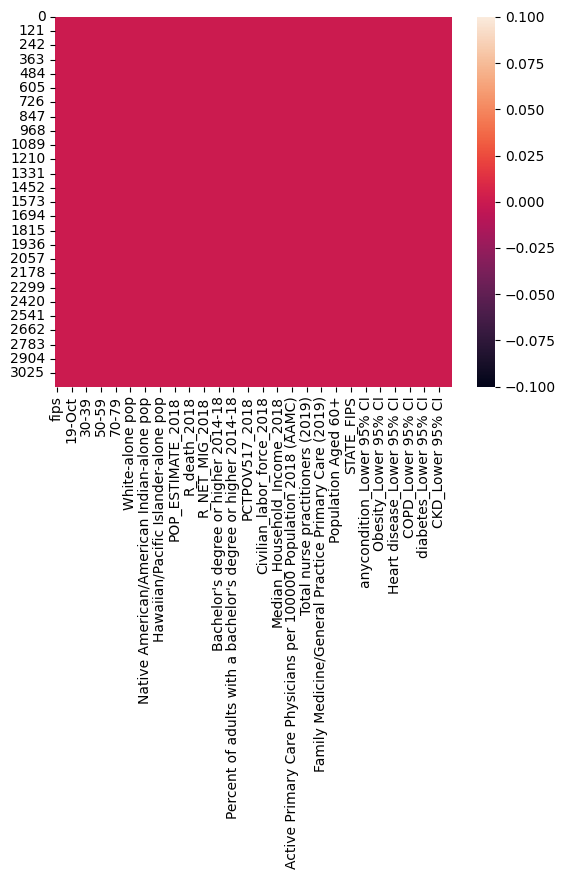

In [23]:
sns.heatmap(total_data.isnull())

## **Pre Processing**

In [24]:
dp = PreProcessing(total_data)

In [25]:
dp.feature_encoding(True)
dp.feature_transform(std=True)
dp.data_split('Heart disease_number')


In [26]:
X_train, y_train, X_test, y_test = dp.get_output()

## **Sanity Check**

In [27]:
print('Train data:\nX:', X_train.shape, 'y:', y_train.shape)
print('Test data:\nX:', X_test.shape, 'y:', y_test.shape)

Train data:
X: (2512, 1995) y: (2512,)
Test data:
X: (628, 1995) y: (628,)


### Save Processed Data

In [28]:
# Saving training and testing data into CSV files
y_train.to_csv("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_train_y.csv", index=False)
X_train.to_csv("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_train_X.csv", index=False)
X_test.to_csv("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_test_X.csv", index=False)
y_test.to_csv("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_test_y.csv", index=False)


### Read Processed Data

In [29]:
y_train_df = pd.read_csv ("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_train_y.csv")
X_train_df = pd.read_csv ("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_train_X.csv")
X_test_df  = pd.read_csv("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_test_X.csv")
y_test_df  = pd.read_csv ("/workspaces/regularized-linear-regression-project-tutorial/data/processed/clean_test_y.csv")


y_train_df.head()

,Heart disease_number
0,-0.225814
1,-0.115392
2,-0.216207
3,-0.007276
4,0.197812


## **Models Training**

In [30]:
y_train_reshaped = y_train_df.values.ravel()  # Convert to a 1D array(error RF model)

In [31]:
models_dict = dict()
for model_type in ml_models:
  start_training_time = timeit.default_timer()
  print("\n", model_type+" Model Training...")
  fit_model = Train(model_type, X_train_df, y_train_reshaped)
  fit_model.train()
  models_dict[model_type] = fit_model.get_model()
  print(model_type+" Training Elapsed Time: ", timeit.default_timer() - start_training_time)


 LR Model Training...
LR Training Elapsed Time:  2.741981158000044

 Lasso Model Training...
Lasso Training Elapsed Time:  0.2806448809999438

 Ridge Model Training...
Ridge Training Elapsed Time:  0.4697918839999602

 DT Model Training...
DT Training Elapsed Time:  0.5002126890000227

 RF Model Training...
RF Training Elapsed Time:  18.47363779400007


## **Model Evaluation**

In [32]:
models_ranking = []
print("\n", model_type+" Model Evaluation...")
for model_type in ml_models:
  eval = Evaluation(models_dict[model_type][0], X_train_df, y_train_reshaped)
  eval.evaluate()
  rmse_train, mae_train, mape_train, r2_train = eval.get_metrics()
  print('\n\n'+model_type + ' RMSE on the train-set : ', rmse_train)
  print(model_type + ' MAE on the train-set : ', mae_train)
  print(model_type + ' MAPE on the train-set : ', mape_train)
  print(model_type + ' R2-score on the train-set : ', r2_train)

  eval = Evaluation(models_dict[model_type][0], X_test, y_test)
  eval.evaluate()
  rmse_test, mae_test, mape_test, r2_test = eval.get_metrics()
  print(model_type + ' RMSE on the test-set : ', rmse_test)
  print(model_type + ' MAE on the test-set : ', mae_test)
  print(model_type + ' MAPE on the test-set : ', mape_test)
  print(model_type + ' R2-score on the test-set : ', r2_test)

  print("Model's Output Parameters - "+ models_dict[model_type][1][0]+ " : ", models_dict[model_type][1][1:])

  if np.abs(r2_train - r2_test) < 0.1:        # no overfitting
    models_ranking.append([model_type, models_dict[model_type][0], r2_test])

  models_ranking = sorted(models_ranking, key=lambda x: x[2], reverse = True)      # finding the best model


 RF Model Evaluation...


LR RMSE on the train-set :  0.008650061241269423
LR MAE on the train-set :  0.004475375739137922
LR MAPE on the train-set :  0.0697652188254047
LR R2-score on the train-set :  0.9999354423223585
LR RMSE on the test-set :  1178503175069.4673
LR MAE on the test-set :  631849582672.6193
LR MAPE on the test-set :  5379398323261.981
LR R2-score on the test-set :  -3.86801859471625e+24
Model's Output Parameters - Linear Model Weights :  (array([ 5.90933772e+07,  4.66392482e+10,  4.07942829e+09, ...,
        2.94195751e+09,  5.72808032e+09, -1.39717323e+09]), -5077398539.66176)


Lasso RMSE on the train-set :  0.9305936379907781
Lasso MAE on the train-set :  0.367185177255128
Lasso MAPE on the train-set :  1.034538931315534
Lasso R2-score on the train-set :  0.2528123365378899
Lasso RMSE on the test-set :  0.5273907315563262
Lasso MAE on the test-set :  0.31764803527300456
Lasso MAPE on the test-set :  0.9513400307887205
Lasso R2-score on the test-set :  0.225374078

In [33]:
print("The best model is: ", models_ranking[0][0], "with a R2-score: ",  models_ranking[0][2])

eval = Evaluation(models_dict[model_type][0], X_test_df, y_test_df)
eval.evaluate()
rmse_test, mae_test, mape_test, r2_test = eval.get_metrics()
print(model_type + ' RMSE on the test-set : ', rmse_test)
print(model_type + ' MAE on the test-set : ', mae_test)
print(model_type + ' MAPE on the test-set : ', mape_test)
print(model_type + ' R2-score on the test-set : ', r2_test)

print("\nPrediction: ", eval.get_predictions())

The best model is:  Ridge with a R2-score:  0.9973740737656656
RF RMSE on the test-set :  0.04189550557439016
RF MAE on the test-set :  0.012617089087807332
RF MAPE on the test-set :  0.06518097832006045
RF R2-score on the test-set :  0.9951116543072495

Prediction:  [-3.13577558e-01  5.17146016e-01 -2.51627102e-01  8.01167494e-02
  3.47968148e-01 -2.63739600e-01 -3.10763200e-01 -2.74683826e-01
 -3.36678477e-01 -3.09493729e-01 -2.76139043e-01 -3.47130799e-01
 -5.08251802e-02 -2.69585445e-01  2.23180785e-01 -1.92925263e-01
  2.94605069e+00 -2.84696125e-01 -2.28685027e-01 -3.33180065e-01
 -2.60954706e-01 -3.16226026e-01 -3.05103100e-01 -3.21216803e-01
  5.55444209e+00 -1.74142596e-01 -3.05260663e-01 -2.30889628e-01
 -3.04809111e-01 -3.44342061e-01 -2.85810595e-01 -2.39307081e-01
 -1.95425135e-01 -1.60296264e-01  1.53395091e-01 -2.59185004e-01
 -1.89977681e-01 -2.79007843e-01 -3.03661975e-01 -2.38537841e-01
 -2.68370416e-01  2.13320926e-01 -3.36885999e-01 -3.50310241e-01
 -1.69838435e-01 

In [34]:
print("Gloabl Elapsed Time ", timeit.default_timer() - global_start_time)

Gloabl Elapsed Time  34.28321758499999


In [1]:

dump(models_ranking("../models/ridge_r2-score_alpha-1.0.sav", "wb")) #need to find Ridge with a R2-score